## 自由時報爬蟲

### 使用requests 抓取資料

In [38]:
import requests
res = requests.get('http://news.ltn.com.tw/list/breakingnews')

In [2]:
res

<Response [200]>

In [4]:
#res.text

### 使用BeautifulSoup 解析資料

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [7]:
news = soup.select('.imm li')

In [29]:
newsary = []
for li in news:
    #print(li)
    title = li.select_one('p').text.strip()
    time  = li.select_one('span').text.strip()
    link  = li.select_one('a').get('href')
    tags  = ','.join([tag.text.strip() for tag in li.select('.immtag')])
    res   = {'time':time, 'title':title, 'link':link, 'tags':tags}
    newsary.append(res)
    #print('=====================================')

### 使用Pandas 整理出結構化資料

In [31]:
import pandas
newsdf = pandas.DataFrame(newsary)

In [33]:
newsdf.head()

,link,tags,time,title
0,http://news.ltn.com.tw/news/world/breakingnews...,國際,09:20,傳統超商小心！ 亞馬遜無人商店開張了
1,http://news.ltn.com.tw/news/politics/breakingn...,政治,09:14,不選台北市長 蔣萬安、柯建銘隔空交火互薦讀「書」
2,http://news.ltn.com.tw/news/life/breakingnews/...,"生活,基隆市",09:12,天天吃好料》基隆「流氓滷味攤」 藝人謝昕回家必吃
3,http://sports.ltn.com.tw/news/breakingnews/231...,體育,09:12,羽球》最難打的對手！泰國一姐奪冠後謙虛讚美戴資穎
4,http://news.ltn.com.tw/news/politics/breakingn...,政治,09:11,中國直升機1小時襲台？美飛官：台灣比阿富汗戰區可怕！


In [36]:
newsdf.to_excel('news.xlsx')

## BeautifulSoup4 說明文檔
- https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## 抓取證交所資料

### 測出目標伺服器容忍值(rate limit)
- https://www.nginx.com/blog/rate-limiting-nginx/

In [ ]:
import requests
import time
for i in range(1,100):
    res = requests.get('http://www.tse.com.tw/exchangeReport/MI_5MINS_INDEX?response=json&date=&_=1516587389044')
    time.sleep(2)
    print(res)

### 不斷更換IP 位置 (使用Proxy)

In [47]:
import requests
proxies = {
    'http':'http://137.74.168.174:8080',
    'https':'https://137.74.168.174:8080'
}
res = requests.get('http://www.tse.com.tw/exchangeReport/MI_5MINS_INDEX?response=json&date=&_=1516587389044', proxies = proxies)
res

<Response [200]>

### 使用Tor 

## Numpy

In [50]:
# Python List
a = [1,2, 'hello', 4, 5]

In [53]:
for ele in a:
    if isinstance(ele, int):
        print(ele + 3)

4
5
7
8


In [54]:
# Numpy array
a = [1,2,3,4,5]

import numpy
na = numpy.array(a)

In [55]:
na

array([1, 2, 3, 4, 5])

In [57]:
na + 3

array([4, 5, 6, 7, 8])

In [58]:
na[0]

1

In [60]:
na[1:3]

array([2, 3])

In [62]:
na > 3

array([False, False, False,  True,  True], dtype=bool)

In [63]:
na[na > 3]

array([4, 5])

In [64]:
na = numpy.array([[1,2,3,4,5],[6,7,8,9,10]])

In [65]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [66]:
na[ 0 , 0 ]

1

In [68]:
na[ 0 , : ]

array([1, 2, 3, 4, 5])

In [69]:
na[ : ,  0 ]

array([1, 6])

In [70]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [72]:
na = numpy.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',
35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']],
      dtype='<U5')

In [74]:
na = numpy.array([['name', 'gender', 'age'], ['frank', 'M', 29], ['mary', 'F', 23],
['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]]) 

In [77]:
na[ 1: 7 ,  1 ]

array(['M', 'F', 'M', 'M', 'F', 'F'],
      dtype='<U6')

In [80]:
import pandas
df = pandas.DataFrame([['frank', 'M', 29], ['mary', 'F', 23],
['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
0    6 non-null object
1    6 non-null object
2    6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [83]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [85]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [86]:
df.columns = ['name', 'gender', 'age']

In [87]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


## Pandas Series

In [88]:

s = pandas.Series([21000,18900,18000])

In [89]:
s

0    21000
1    18900
2    18000
dtype: int64

In [90]:
pandas.Series([21000,18900,18000], index=['Iphone','Edge S7','HTC M1'])

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [92]:
s = pandas.Series({'Iphone':21000,'Edge S7':18900, 'HTC M1':18000})

In [93]:
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [95]:
s[2]

21000

In [96]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [98]:
s[s < 20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [99]:
cheap = s < 20000

In [100]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [102]:
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [101]:
s[2]

21000

In [103]:
s['Iphone']

21000

In [104]:
s['Iphone'] = 20000

In [105]:
s

Edge S7    18900
HTC M1     18000
Iphone     20000
dtype: int64

In [109]:
s[s < 20000]  = s[s < 20000] * 0.8

In [110]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [111]:
'Iphone' in s

True

In [112]:
'mi' in s

False

In [113]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [114]:
numpy.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [115]:
s.max()

20000

In [116]:
s.min()

14400

In [117]:
s.mean()

16506.666666666668

In [118]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [119]:
s[['Iphone', 'HTC M1']]

Iphone    20000
HTC M1    14400
dtype: int64

In [120]:
s[['mi', 'HTC M1']]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


mi            NaN
HTC M1    14400.0
dtype: float64

In [124]:
s2 = s[['Iphone', 'HTC M1']] + s[['mi', 'HTC M1']]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [125]:
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [127]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [128]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

## Pandas DataFrame

In [129]:
df = pandas.DataFrame([['frank', 'M', 29], ['mary', 'F', 23],
['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [130]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [131]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [132]:
df.columns = ['name', 'gender', 'age']

In [133]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [134]:
? pandas.DataFrame

In [135]:
df = pandas.DataFrame([['frank', 'M', 29], ['mary', 'F', 23],
['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]], columns= ['name', 'gender', 'age'])

In [136]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [140]:
df = pandas.DataFrame([{'name':'frank', 'gender':'M', 'age':29}, \
                  {'name':'mary', 'gender':'F', 'age':23},  \
                  {'name':'tom', 'gender':'M', 'age':35},   \
                  {'name':'ted', 'gender':'M', 'age':33},   \
                  {'name':'jean', 'gender':'F', 'age':21},  \
                  {'name':'lisa', 'gender':'F', 'age':20}])

In [141]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [142]:
df2 = pandas.DataFrame([{'name': 'David', 'gender': 'M', 'age': 33}, {'name': 'carol', 'gender': 'F'}])

In [143]:
df2

,age,gender,name
0,33.0,M,David
1,NaN,F,carol


In [144]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [145]:
df.ix[0]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


age          29
gender        M
name      frank
Name: 0, dtype: object

In [147]:
df.loc[0]

age          29
gender        M
name      frank
Name: 0, dtype: object

In [148]:
df.loc[1]

age         23
gender       F
name      mary
Name: 1, dtype: object

In [150]:
df.loc[1:4]

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [151]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [152]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [153]:
df.loc[ 1:2  ,  ['name', 'age']  ]

,name,age
1,mary,23
2,tom,35


In [155]:
df['gender']

0    M
1    F
2    M
3    M
4    F
5    F
Name: gender, dtype: object

In [156]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [157]:
df[df['gender'] == 'M']

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [158]:
df.loc[   df['gender'] == 'M'  ,  ['name', 'age']  ]

,name,age
0,frank,29
2,tom,35
3,ted,33


In [161]:
df[(df['gender'] == 'M' ) & (df['age'] >= 30 )]

,age,gender,name
2,35,M,tom
3,33,M,ted


In [162]:
df[(df['gender'] == 'M' ) | (df['age'] >= 30 )]

,age,gender,name
0,29,M,frank
2,35,M,tom
3,33,M,ted


In [163]:
df.loc[  (df['gender'] == 'M' ) & (df['age'] >= 30 )  , ['name', 'age']    ]

,name,age
2,tom,35
3,ted,33


In [165]:
df.head()

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [166]:
df.tail()

,age,gender,name
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [167]:
df.head(10)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
age       6 non-null int64
gender    6 non-null object
name      6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [169]:
df.min()

age          20
gender        F
name      frank
dtype: object

In [170]:
df.max()

age        35
gender      M
name      tom
dtype: object

In [171]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [172]:
df.dtypes

age        int64
gender    object
name      object
dtype: object

In [173]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [174]:
df['employee'] =True

In [175]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [176]:
del df['employee']

In [177]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [185]:
? df.drop

In [180]:
df['employee'] =True

In [182]:
df

,age,gender,name,employee
0,29,M,frank,True
1,23,F,mary,True
2,35,M,tom,True
3,33,M,ted,True
4,21,F,jean,True
5,20,F,lisa,True


In [183]:
df = df.drop('employee', axis = 1)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [187]:
df.drop('employee', axis = 1, inplace=True)

In [189]:
df.loc[6] = {'age':20, 'gender': 'F', 'name': 'qoo'}

In [190]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo


In [192]:
df.append(pandas.DataFrame([{'age':20, 'gender':'F','name':'qoo'}]), ignore_index=True)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo
7,20,F,qoo


In [196]:
df.drop(6)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [197]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo


In [198]:
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [200]:
df['userid'] = range(101,108)

In [201]:
df

,age,gender,name,userid
0,29,M,frank,101
1,23,F,mary,102
2,35,M,tom,103
3,33,M,ted,104
4,21,F,jean,105
5,20,F,lisa,106
6,20,F,qoo,107


In [202]:
df.set_index('userid',inplace=True)

In [203]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa
107,20,F,qoo


In [204]:
df.loc[102]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [205]:
df.loc[0]

KeyError: 'the label [0] is not in the [index]'

In [206]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [207]:
df.iloc[[1,3,5]]

,age,gender,name
userid,,,
102,23,F,mary
104,33,M,ted
106,20,F,lisa


In [208]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


## Pandas DataFrame 的分析功能

In [210]:
df = pandas.DataFrame([{'name':'frank', 'gender':'M', 'age':29}, \
                  {'name':'mary', 'gender':'F', 'age':23},  \
                  {'name':'tom', 'gender':'M', 'age':35},   \
                  {'name':'ted', 'gender':'M', 'age':33},   \
                  {'name':'jean', 'gender':'F', 'age':21},  \
                  {'name':'lisa', 'gender':'F', 'age':20}])

In [211]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [214]:
# SELECT gender, AVG(age) FROM df GROUP BY gender
df.groupby(['gender'])['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64

In [216]:
df.sort_values('age')

,age,gender,name
5,20,F,lisa
4,21,F,jean
1,23,F,mary
0,29,M,frank
3,33,M,ted
2,35,M,tom


In [217]:
df.sort_values('age', ascending=False)

,age,gender,name
2,35,M,tom
3,33,M,ted
0,29,M,frank
1,23,F,mary
4,21,F,jean
5,20,F,lisa


In [221]:
## SELECT gender, AVG(age) FROM df 
## GROUP BY gender ORDER BY age DESC LIMIT 3
df.groupby(['gender'])['age'].mean().sort_values(ascending = False).head(3)

gender
M    32.333333
F    21.333333
Name: age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


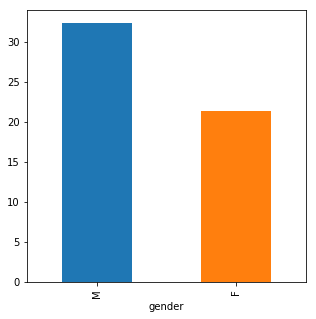

In [226]:
% pylab inline
df.groupby(['gender'])['age'].mean()\
  .sort_values(ascending = False).plot(kind = 'bar', figsize=[5,5])

## Pandas 的接口

In [227]:
import pandas
ltnnews = pandas.read_clipboard()

In [228]:
ltnnews

,國際,09:20,傳統超商小心！,亞馬遜無人商店開張了
0,政治,09:14,不選台北市長,蔣萬安、柯建銘隔空交火互薦讀「書」
1,"生活,基隆市",09:12,天天吃好料》基隆「流氓滷味攤」,藝人謝昕回家必吃
2,體育,09:12,羽球》最難打的對手！泰國一姐奪冠後謙虛讚美戴資穎,NaN
3,政治,09:11,中國直升機1小時襲台？美飛官：台灣比阿富汗戰區可怕！,NaN
4,娛樂,09:07,男星經營副業一把罩,出國拍戲「怎麼還有人找」
5,體育,09:03,澳網》謝淑薇鬼之切球,曾讓前球后莎娃直呼「夢魘」
6,財經,09:02,台股開盤上漲18.94點,報11169.79點


In [229]:
?pandas.read_html

## 使用 Pandas DataFrame 讀取網頁表格

In [13]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'off':'1',
'queryName':'co_id',
'inpuType':'co_id',
'TYPEK':'all',
'co_id':'2330'    
    
}
res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t79sb02', data = payload)
res.encoding = 'utf-8'


In [14]:
res.text

'\r\n\r\n<html>\r\n<head>\r\n\t<title>公開資訊觀測站</title>\r\n<!--\t<link href="css/css1.css" rel="stylesheet" type="text/css" Media="Screen"/> -->\r\n<!--\t<script type="text/javascript" src="js/mops1.js"></script> -->\r\n</head>\r\n\r\n<body>\r\n<script>\nfunction fun(form,val)\n{\n\tform.step.value=val;\n}\n</script>\n<center>\n<form action=/mops/web/ajax_t79sb02 method=post>\n<table class=\'noBorder\'><tr><td class=\'compName\' align=\'center\'>\n<b>\n本資料由\u3000台灣積體電路製造股份有限公司\u3000提供</b>\n</td></tr></table>\n<table class=\'hasBorder\' width=\'90%\'>\n<tr ><th class=\'tblHead\' align=center>事實發生日</th><th class=\'tblHead\'>重要子公司名稱</th><th class=\'tblHead\'>主要經營業務</th>\n<th class=\'tblHead\' align=center>地區</th><th class=\'tblHead\'>符合重要子公司認定之標準(註)</th></tr>\n<tr class=\'even\'><td align=left>93/04/16</td>\n<td  align=left>台灣積體電路(北美)公司</td><td  align=left>積體電路及其他半導體裝置之銷售業務&nbsp;</td><td  align=left>U.S.A/美國&nbsp;</td><td  align=left>1</td></tr>\n<tr class=\'odd\'><td align=left>106/02/16</

In [16]:
dfs = pandas.read_html(res.text)

In [19]:
df = dfs[1]

In [21]:
df.columns = df.iloc[0]

In [23]:
df.drop(0, inplace=True)

In [25]:
df.to_excel('2330_child.xlsx')

## 解析表格

In [1]:
table_sample = '''
<html>
<table>
        <tr><th> c1 </th> <th> c2 </th></tr>
        <tr><td>  100</td> <td> qio</td></tr>
        <tr><td> 200</td> <td> qqqqq</td></tr>
        <tr><td> 300</td> <td> ccc</td></tr>

</table>
</html>
'''

from bs4 import BeautifulSoup
soup = BeautifulSoup(table_sample, 'html.parser')

In [2]:
trary = []
for tr in soup.select('tr')[1:]:
    tdary = []
    for td in tr.select('td'):
        tdary.append(td.text)
    trary.append(tdary)

In [3]:
trary

[['  100', ' qio'], [' 200', ' qqqqq'], [' 300', ' ccc']]

In [4]:
import pandas
df = pandas.DataFrame(trary)

In [5]:
df.columns = [ele.text for ele in soup.select('tr')[0].select('th')]

In [6]:
df

,c1,c2
0,100,qio
1,200,qqqqq
2,300,ccc


In [258]:
! pip install lxml

In [10]:
dfs = pandas.read_html(table_sample, header=[0])

In [11]:
dfs[0]

,c1,c2
0,100,qio
1,200,qqqqq
2,300,ccc


## 使用Python 操作 SQLite

In [28]:
import sqlite3 
con = sqlite3.connect('test.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print(data)
con.close()

('3.16.0',)


In [29]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print(data)

('3.16.0',)


In [31]:
import sqlite3
with sqlite3.connect("test.sqlite") as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data = cur.fetchall() 
    for rec in data:
        print(rec[0], rec[1])

0912173381 United State
0928375018 Tokyo Japan
0957209108 Taipei


In [32]:
import sqlite3
with sqlite3.connect("test.sqlite") as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data = cur.fetchone()
    print(data)
    data = cur.fetchall() 
    print(data)

('0912173381', 'United State')
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [47]:
import sqlite3
with sqlite3.connect("test.sqlite") as con:
    cur = con.cursor()
    try:
        cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State 2','John',22)") 
    except:
        print('error')
        
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data = cur.fetchall() 
    print(data)

error
[('0912173381', 'United State'), ('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [34]:
! pip install xlrd

    100% |████████████████████████████████| 112kB 373kB/s ta 0:00:01


In [35]:
import pandas
df = pandas.read_excel('news.xlsx')

In [37]:
import sqlite3
with sqlite3.connect('test.sqlite') as con:
    df.to_sql('news', con = con, if_exists='replace' )

In [38]:
import sqlite3
with sqlite3.connect('test.sqlite') as con:
    df = pandas.read_sql_query('select * from news limit 3', con = con)

In [39]:
df

,index,link,tags,time,title
0,0,http://news.ltn.com.tw/news/world/breakingnews...,國際,09:20,傳統超商小心！ 亞馬遜無人商店開張了
1,1,http://news.ltn.com.tw/news/politics/breakingn...,政治,09:14,不選台北市長 蔣萬安、柯建銘隔空交火互薦讀「書」
2,2,http://news.ltn.com.tw/news/life/breakingnews/...,"生活,基隆市",09:12,天天吃好料》基隆「流氓滷味攤」 藝人謝昕回家必吃


In [42]:
import sqlite3
with sqlite3.connect('test.sqlite') as con:
    df = pandas.read_sql_query('select count(1) as cnt from news', con = con)

In [43]:
df

,cnt
0,17
